In [1]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/mouse_drug_data.csv"
clinical_trial_data_to_load = "D:/MyWork/GeorgiaTech/ClassesWork/5_HomeWork-Matplotlib/clinicaltrial_data.csv"

df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview


In [2]:
df_mouse_drug_data.head(2)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn


In [3]:
df_clinical_trial_data.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [4]:
df_mouse_drug_data.count()

Mouse ID    250
Drug        250
dtype: int64

In [5]:
df_clinical_trial_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
df_clinical_trial_data["Mouse ID"].nunique()

249

In [7]:
df_mouse_drug_data["Mouse ID"].nunique()

249

In [8]:
#as we can see, mouse id is not a unique value, so we can not join both dataset just by mouse id
#
df_mouse_drug_data["Mouse ID"].count()

250

In [9]:
#df_mouse_drug_data
df_clinical_trial_data.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [10]:
df_mouse_drug_data.dtypes

Mouse ID    object
Drug        object
dtype: object

In [11]:
import numpy as np
def parse(x):
    try:
        return str(x)
    except ValueError:
        return np.nan



In [12]:
df_mouse_drug_data['Mouse ID'] = df_mouse_drug_data['Mouse ID'].apply(str)
#df_clinical_trial_data.join(other=df_mouse_drug_data, on="Mouse ID", how="left")
# dtype = {"Mouse ID":str}
# df_mouse_drug_data["Mouse ID"] = (str(df_mouse_drug_data["Mouse ID"]))
df_mouse_drug_data.dtypes

Mouse ID    object
Drug        object
dtype: object

In [13]:
#https://datacarpentry.org/python-ecology-lesson/05-merging-data/
merged_inner = pd.merge(left=df_mouse_drug_data,right=df_clinical_trial_data,how="inner", left_on="Mouse ID", right_on="Mouse ID")


In [14]:
merged_inner.head(5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [19]:
mean_tumor = merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

In [20]:
mean_tumor.head(2)

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
Name: Tumor Volume (mm3), dtype: float64

In [21]:
#https://www.geeksforgeeks.org/python-pandas-series-iteritems/
my_list = []
for items in mean_tumor.iteritems(): 
    drug, timepoint = items[0]
    my_list.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })

In [22]:
pd.DataFrame(my_list).head(4)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317


## Tumor Response to Treatment

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



In [88]:
#https://stackoverflow.com/questions/46129774/pandas-standard-error-calculation-issue
#mean_tumor = merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
#standard_errors = [sem(s) for s in merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]]
std_error = (merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]).sem()
#type(std_error)
my_list2 = []
for items in std_error.iteritems(): 
    drug, timepoint = items[0]
    my_list2.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Tumor Volume (mm3)": items[1]
        })
    

In [98]:
err = pd.DataFrame(my_list2)
mai = pd.DataFrame(my_list)

In [99]:
err.head(1)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.0


In [100]:
mai.head(1)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.0


In [116]:
mai["Error"] = err["Tumor Volume (mm3)"].astype(float)
mai.dtypes
# type(mai.loc[mai["Drug"] == "Placebo",["Error"]])

Drug                   object
Timepoint               int64
Tumor Volume (mm3)    float64
Error                 float64
dtype: object

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [23]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
#pd.DataFrame(my_list2).set_index("Drug").T.head(2)
df2 = pd.DataFrame(my_list2).pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [24]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot
df1 = pd.DataFrame(my_list).pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
df1

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


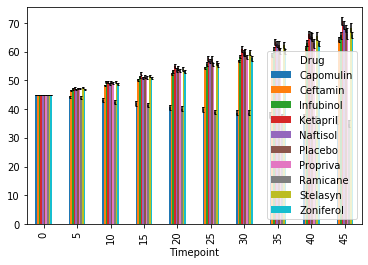

In [21]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-errorbars
fig, ax = plt.subplots()
df1.plot.bar(yerr=df2, ax=ax, capsize=1)

In [25]:
df1.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [32]:
pd.DataFrame(my_list).head(2)
first_scatter = pd.DataFrame(my_list).loc[pd.DataFrame(my_list)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]
first_scatter.head(2)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [80]:
pd.DataFrame(my_list2).head(4)
first_scatter_error = pd.DataFrame(my_list2).loc[pd.DataFrame(my_list2)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]
first_scatter_error.head(2)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593


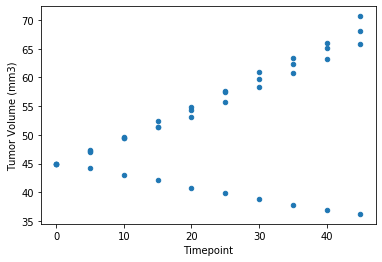

In [35]:
#df1.loc[:, ["Capomulin", "Infubinol", "Ketapril", "Placebo"]].plot.scatter(x="Capomulin",y="Placebo")
pd.DataFrame(first_scatter).plot.scatter(x="Timepoint", y="Tumor Volume (mm3)")
# plot
# plt.scatter(first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Tumor Volume (mm3)"]]
#             , marker="o", facecolors="red", edgecolors="black", s=100, alpha=0.90)


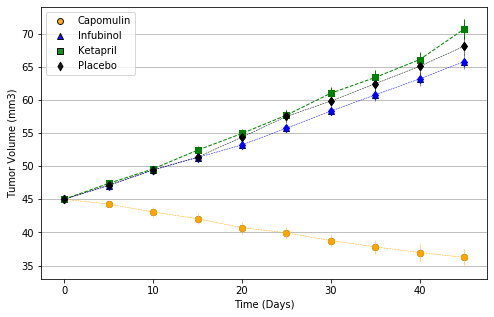

In [130]:
# https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
plt.figure(figsize=(8,5))



# plt.scatter(first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Tumor Volume (mm3)"]]
#             , marker="o", facecolors="orange", edgecolors="black", alpha=0.90, label="Capomulin")
# plt.scatter(first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Tumor Volume (mm3)"]]
#             , marker="^", facecolors="blue", edgecolors="black", alpha=0.90, label="Infubinol")
# plt.scatter(first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Tumor Volume (mm3)"]]
#             , marker="s", facecolors="green", edgecolors="black", alpha=0.90, label="Ketapril" )
# plt.scatter(first_scatter.loc[first_scatter["Drug"] == "Placebo",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Placebo",["Tumor Volume (mm3)"]]
#             , marker="d", facecolors="black", edgecolors="black", alpha=0.90, label="Placebo")


# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Capomulin",["Tumor Volume (mm3)"]],color='orange'
#          , marker='o', linestyle='dashed', linewidth=1, markersize=7, label="Capomulin")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Infubinol",["Tumor Volume (mm3)"]],color='blue'
#          , marker='^', linestyle='dashed', linewidth=1, markersize=7, label="Infubinol")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Ketapril",["Tumor Volume (mm3)"]],color='green'
#          , marker='s', linestyle='dashed', linewidth=1, markersize=7, label="Ketapril")

# plt.plot(first_scatter.loc[first_scatter["Drug"] == "Placebo",["Timepoint"]]
#             , first_scatter.loc[first_scatter["Drug"] == "Placebo",["Tumor Volume (mm3)"]],color='black'
#          , marker='d', linestyle='dashed', linewidth=1, markersize=7, label="Placebo")


plt.scatter(mai.loc[mai["Drug"] == "Capomulin",["Timepoint"]]
            , first_scatter.loc[mai["Drug"] == "Capomulin",["Tumor Volume (mm3)"]]
            , marker="o", facecolors="orange", edgecolors="black", alpha=0.90, label="Capomulin")
plt.scatter(mai.loc[mai["Drug"] == "Infubinol",["Timepoint"]]
            , first_scatter.loc[mai["Drug"] == "Infubinol",["Tumor Volume (mm3)"]]
            , marker="^", facecolors="blue", edgecolors="black", alpha=0.90, label="Infubinol")
plt.scatter(mai.loc[mai["Drug"] == "Ketapril",["Timepoint"]]
            , mai.loc[mai["Drug"] == "Ketapril",["Tumor Volume (mm3)"]]
            , marker="s", facecolors="green", edgecolors="black", alpha=0.90, label="Ketapril" )
plt.scatter(mai.loc[mai["Drug"] == "Placebo",["Timepoint"]]
            , mai.loc[mai["Drug"] == "Placebo",["Tumor Volume (mm3)"]]
            , marker="d", facecolors="black", edgecolors="black", alpha=0.90, label="Placebo")

plt.errorbar(x=mai.loc[mai["Drug"] == "Capomulin",["Timepoint"]].values
            , y=mai.loc[mai["Drug"] == "Capomulin",["Tumor Volume (mm3)"]].values
            , yerr=mai.loc[mai["Drug"] == "Capomulin",["Error"]].values
            , color='orange', marker='o', linestyle='dashed', linewidth=0.5
            )

plt.errorbar(x=mai.loc[mai["Drug"] == "Infubinol",["Timepoint"]].values
            , y=mai.loc[mai["Drug"] == "Infubinol",["Tumor Volume (mm3)"]].values
            , yerr=mai.loc[mai["Drug"] == "Infubinol",["Error"]].values
            , color='blue', marker='d', linestyle='dashed', linewidth=0.5
            )

plt.errorbar(x=mai.loc[mai["Drug"] == "Ketapril",["Timepoint"]].values
            , y=mai.loc[mai["Drug"] == "Ketapril",["Tumor Volume (mm3)"]].values
            , yerr=mai.loc[mai["Drug"] == "Ketapril",["Error"]].values
            , color='green', marker='s', linestyle='dashed', linewidth=1
            )

plt.errorbar(x=mai.loc[mai["Drug"] == "Placebo",["Timepoint"]].values
            , y=mai.loc[mai["Drug"] == "Placebo",["Tumor Volume (mm3)"]].values
            , yerr=mai.loc[mai["Drug"] == "Placebo",["Error"]].values
            , color='black', marker='d', linestyle='dashed', linewidth=0.5
            )


# errorbar(x,y,err)

plt.ylim(33, 74)

plt.grid(axis = "y")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")

# plt.scatter()

In [79]:
pd.DataFrame(my_list2).head(4)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [25]:
mean_sites = merged_inner.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()
mean_sites.head(3)

Drug       Timepoint
Capomulin  0            0.00
           5            0.16
           10           0.32
Name: Metastatic Sites, dtype: float64

In [26]:
#https://www.geeksforgeeks.org/python-pandas-series-iteritems/
my_list3 = []
for items in mean_sites.iteritems(): 
    drug, timepoint = items[0]
    my_list3.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })
pd.DataFrame(my_list3).head(4)

,Drug,Metastatic Sites,Timepoint
0,Capomulin,0.000,0
1,Capomulin,0.160,5
2,Capomulin,0.320,10
3,Capomulin,0.375,15


In [27]:
std_error_sites = (merged_inner.groupby(["Drug","Timepoint"])["Metastatic Sites"]).sem()
my_list4 = []
for items in std_error_sites.iteritems(): 
    drug, timepoint = items[0]
    my_list4.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Metastatic Sites": items[1]
        })
pd.DataFrame(my_list4).head(4)

,Drug,Metastatic Sites,Timepoint
0,Capomulin,0.000000,0
1,Capomulin,0.074833,5
2,Capomulin,0.125433,10
3,Capomulin,0.132048,15


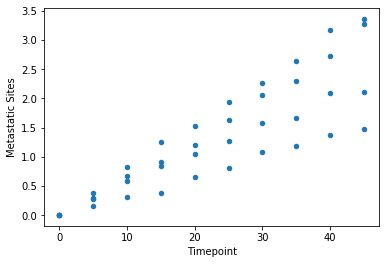

In [28]:
third_scatter = pd.DataFrame(my_list3).loc[pd.DataFrame(my_list3)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]
pd.DataFrame(third_scatter).plot.scatter(x="Timepoint", y="Metastatic Sites")

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [29]:
#merged_inner.head(2)
mice_counts = merged_inner.groupby(["Drug","Timepoint"])["Mouse ID"].count()

In [31]:
my_list5 = []
for items in mice_counts.iteritems(): 
    drug, timepoint = items[0]
    my_list5.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Counts": items[1]
        })
pd.DataFrame(my_list5).head(4)

,Counts,Drug,Timepoint
0,25,Capomulin,0
1,25,Capomulin,5
2,25,Capomulin,10
3,24,Capomulin,15


In [32]:
eighths_scatter = pd.DataFrame(my_list5).loc[pd.DataFrame(my_list)["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]),:]
counts_by_drug = eighths_scatter.loc[ eighths_scatter["Timepoint"]==0 , :]
merged_second = pd.merge(left=eighths_scatter,right=counts_by_drug,how="inner", left_on="Drug", right_on="Drug")
merged_second.head(2)

,Counts_x,Drug,Timepoint_x,Counts_y,Timepoint_y
0,25,Capomulin,0,25,0
1,25,Capomulin,5,25,0


In [33]:
merged_second["Counts%"] = (merged_second["Counts_x"] / merged_second["Counts_y"]) * 100
merged_second

,Counts_x,Drug,Timepoint_x,Counts_y,Timepoint_y,Counts%
0,25,Capomulin,0,25,0,100.0
1,25,Capomulin,5,25,0,100.0
2,25,Capomulin,10,25,0,100.0
3,24,Capomulin,15,25,0,96.0
4,23,Capomulin,20,25,0,92.0
5,22,Capomulin,25,25,0,88.0
6,22,Capomulin,30,25,0,88.0
7,22,Capomulin,35,25,0,88.0
8,21,Capomulin,40,25,0,84.0
9,21,Capomulin,45,25,0,84.0


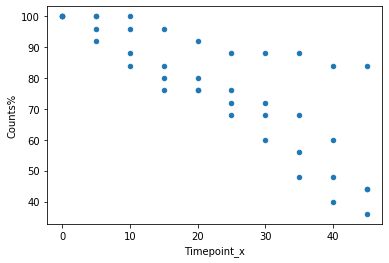

In [34]:
pd.DataFrame(merged_second).plot.scatter(x="Timepoint_x", y="Counts%")

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [43]:
mean_tumor = merged_inner.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
mean_tumor.count()

100

In [55]:
my_list9 = []
for items in mean_tumor.iteritems(): 
    drug, timepoint = items[0]
    my_list9.append( {
            "Drug": drug
            , "Timepoint": timepoint
            , "Counts": items[1]
        })
my_frame = pd.DataFrame(my_list9)
my_frame_0 = my_frame.loc[my_frame["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & my_frame["Timepoint"].isin([0]),:]
my_frame_45 = my_frame.loc[my_frame["Drug"].isin(["Capomulin", "Infubinol", "Ketapril", "Placebo"]) & my_frame["Timepoint"].isin([45]),:]
my_frame_per = pd.merge(left=my_frame_0,right=my_frame_45,how="inner", left_on="Drug", right_on="Drug")
my_frame_per["Change%"] = (my_frame_per["Counts_y"]-my_frame_per["Counts_x"])/my_frame_per["Counts_x"] * 100


,Counts_x,Drug,Timepoint_x,Counts_y,Timepoint_y,Change%
0,45.0,Capomulin,0,36.236114,45,-19.475303
1,45.0,Infubinol,0,65.755562,45,46.123472
2,45.0,Ketapril,0,70.662958,45,57.028795
3,45.0,Placebo,0,68.084082,45,51.297960


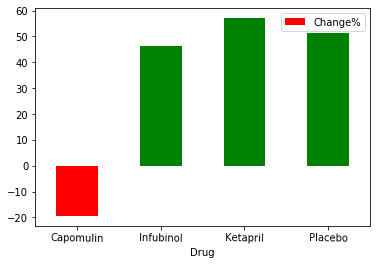

In [72]:
# https://github.com/pandas-dev/pandas/issues/18449
my_frame_per.plot.bar(x="Drug", y="Change%", color=np.where(my_frame_per["Change%"]>0, 'g', 'r'), rot=-1)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)